In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2D Histogram
    지금까지는 1차원 히스토그램을 계산하고 그려보았다. 1차원이라고 부른 이유는 지금까지 한 개의 채널(대부분 Grayscale)에서 픽셀들이 0~255 값 범위에서 어떻게 분포하고 있는지, 그 intensity 한 가지 요소만을 고려했기 때문이다.
    
    2D Histogram은 2가지 요소를 고려해야 한다. 컬러 이미지는 Blue, Green, Red 3가지 색 조합으로 표현되므로 각각 채널의 intensity를 분석하여 히스토그램을 만들기 위해서는 3차원 좌표가 필요하다. 하지만 컬러이미지 각 픽셀의 Hue와 Saturation, 2가지 값을 분석하여 2D 히스토그램을 만들 수 있다.

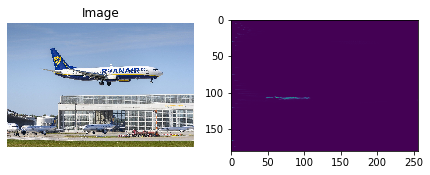

In [2]:
img = cv2.imread('ryanair-5249631_1920.jpg')
rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist_hsv = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

cv2.imshow('Hist', hist_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(rbg)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hist_hsv, interpolation="nearest")
plt.tight_layout()
plt.show()

    hsv 색공간을 가지는 이미지에서 Hue와 Saturation과 관련하여 동시에 히스토그램을 구하고 싶으면 앞서 배웠던 calcHist 함수를 이용하면 된다. matplotlib 모듈을 사용하여 컬러이미지의 히스토그램을 봤을 때, Hue = 100, Saturation = 50~100 정도의 색깔이 주로 사용되었다는 것을 알 수 있다.
    
## cv2.calcHist(images, channels, mask, histSize, ranges [, hist [, accumulate]]) → hist
    2. channels : HSV에서 Hue와 Saturation 값을 2개 입력해야 하므로 [0, 1](Hue, Saturation)처럼 2개 입력한다.
    4. histSize : Hue와 Saturation을 위한 Bin 갯수를 순서대로 입력한다. Hue의 범위는 0~179, Saturation 범위는 0~255 이므로 각각 180, 256 2개를 입력한다.
    5. ranges : Hue와 Saturation을 위한 range 범위를 순서대로 입력한다. Hue의 범위는 0~179, Saturation 범위는 0~255 이므로 0, 180, 0, 256을 순서대로 입력한다.
    
    이렇게 계산된 히스토그램은 가로축에는 0~255 범위를 가진 Saturation 값이, 세로축에는 0~179 범위를 가진 Hue 값이 분포되어 있다. 이렇게 우리는 컬러이미지 히스토그램을 만들 수 있으며, 이를 이용해서 히스토그램 배경 투사에서 유용하게 사용할 수 있다.

---
    사실 1D Histogram의 경우에는 가로축에는 0~255 범위를 가진 픽셀의 강도 Intensity 값이, 세로축에는 각각의 intensity를 가진 픽셀들의 갯수를 나타내어 직관적으로 볼 수 있었다. 하지만 2D Histogram에는 openCV 함수로 보면 Grayscale 이미지로 표현이 되고, matplotlib 모듈로 보면 openCV로 봤을 때보다 한층 더 낫지만 이 역시 Hue와 Saturation에 대해 잘 알고있지 않으면 어떤 색이 주로 분포하고 있는지 직관적으로 알기 힘들다. 그래서 다음과 같이 hsvmap을 만들어 일치하는 값을 찾는 형식으로 만들 수 있다.

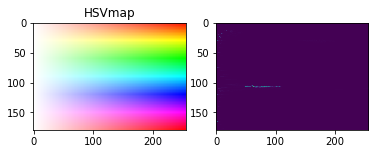

In [3]:
hsvmap = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices((180, 256))
hsvmap[:, :, 0] = h
hsvmap[:, :, 1] = s
hsvmap[:, :, 2] = 255
hsvmap = cv2.cvtColor(hsvmap, cv2.COLOR_HSV2BGR)

cv2.imshow('HSVmap', hsvmap)
cv2.waitKey(0)
cv2.destroyAllWindows()

hsvmap_rgb = cv2.cvtColor(hsvmap, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(hsvmap_rgb)
plt.title('HSVmap')

plt.subplot(1, 2, 2)
plt.imshow(hist_hsv, interpolation="nearest")
plt.show()

    256 * 180 크기의 numpy 배열을 만들어 세로축으로는 Hue, 가로축으로는 Saturation 값을 index순으로 기록한 후 이를 다시 BGR 색공간으로 전환하여 화면에 display하는 코드이다. Value는 255 값을 일괄적으로 입력한다. 이렇게 만든 HSV map과 컬러이미지 히스토그램을 비교해서 보면 이미지가 옅은 파란색이 집중적으로 분포하고 있다는 것을 알 수 있다.

In [4]:
hscale = 10

def onChange(x):
    global hscale
    hscale = x
    
def HSVmap():
    hsvmap = np.zeros((180, 256, 3), np.uint8)
    h, s = np.indices(hsvmap.shape[:2])

    hsvmap[:, :, 0] = h
    hsvmap[:, :, 1] = s
    hsvmap[:, :, 2] = 255    
    hsvmap = cv2.cvtColor(hsvmap, cv2.COLOR_HSV2BGR)
    return hsvmap

def hist2D():
    img = cv2.imread('ryanair-5249631_1920.jpg')
    hsvmap = HSVmap()
    
    cv2.namedWindow('hist2D', cv2.WINDOW_NORMAL)
    cv2.createTrackbar('scale', 'hist2D', hscale, 32, onChange)
    
    while True:
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
        hist = np.clip(hist * 0.005 * hscale, 0, 1)
        hist = hsvmap * hist[:, :, np.newaxis] / 255.0
        cv2.imshow('hist2D', hist)
        
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
            
    cv2.destroyAllWindows()

In [5]:
hist2D()

    다음은 앞서 만든 HSV map과 openCV 함수로 연 컬러이미지 히스토그램을 결합하여 어느 부분의 색깔이 주로 나타나는지를 확인하기 위한 함수이다.
    
    np.clip(hist * 0.005 * hscale, 0, 1) 함수는 픽셀값을 조절하기 위한 함수이다. 위 함수는 hist * 0.005 * hscale 수식 계산 결과 0보다 작은 값은 0으로, 1보다 큰 값은 1로 변경한 배열을 반환한다. 그래서 hscale 값을 어떻게 조절하느냐에 따라 2D 히스토그램에서 노출되는 픽셀들이 조절된다.
    
    hist = hsvmap * hist[:, :, np.newaxis] / 255.0 수식을 통해 HSV map 위에 컬러 이미지 히스토그램이 생성되도록 만든다. hsvmap은 3차원 행렬, hist는 2차원 행렬이므로 np.newaxis 함수를 통해 3차원으로 만든다. 그리고 hsvmap과 hist를 곱한 후, 255로 나눠 픽셀값을 0~1사이로 정규화 되도록 한다. cv2.imshow() 함수에 입력되는 numpy 배열이 32비트의 부동소숫점일 경우 픽셀값들에 255가 곱해져서 보여지게 된다.
    
    이렇게 컬러이미지에 HSV map을 올리면 어느 색이 주로 사용되었는지 직관적으로 확인할 수 있다. 이 함수를 살짝 변형시켜 웹캠 및 동영상에서 활용하면 시시각각 변하는 색깔을 확인할 수 있다.

In [6]:
hscale = 10

def onChange(x):
    global hscale
    hscale = x

    
def HSVmap():
    hsvmap = np.zeros((180, 256, 3), np.uint8)
    h, s = np.indices(hsvmap.shape[:2])

    hsvmap[:, :, 0] = h
    hsvmap[:, :, 1] = s
    hsvmap[:, :, 2] = 255    
    hsvmap = cv2.cvtColor(hsvmap, cv2.COLOR_HSV2BGR)
    return hsvmap


def hist2D():
    hsvmap = HSVmap()
    
    try:
        video = cv2.VideoCapture(0)
        print("영상을 불러옵니다.")
    except:
        print("영상을 불러오는데 실패했습니다.")
        return
    
    cv2.namedWindow('hist2D', cv2.WINDOW_NORMAL)
    cv2.createTrackbar('scale', 'hist2D', hscale, 32, onChange)
    
    while True:
        ret, frame = video.read()
        cv2.imshow('Camera', frame)
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dark = hsv[:, :, 2] < 32
        hsv[dark] = 0
        
        hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
        hist = np.clip(hist * 0.005* hscale, 0, 1)
        hist = hsvmap * hist[:, :, np.newaxis] / 255.0
        cv2.imshow('hist2D', hist)
        
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
        
    print('녹화를 종료합니다.')    
    video.release()
    cv2.destroyAllWindows()

In [7]:
hist2D()

영상을 불러옵니다.
녹화를 종료합니다.
